# La serie exponencial compleja de Fourier

Una alternativa para la representación de las señales en téminos de una suma de sub-funciones o componentes  es la serie exponencial de Fourier. Considere la ecuación  {eq}`serie_fourier`, como es sabido, las funciones seno y coseno se pueden representar en forma de una función exponencial compleja, de manera que la forma exponencial compleja de dicha expresión adquiere la estructura ({cite:t}`KamenMATLAB`):


```{math}
:label: serie_fourier_compleja
\begin{equation}
   x(t)=\sum^{\infty}_{k=-\infty}c_k e ^{jk\omega_0t},~~-\infty<t<\infty
 \end{equation}
```
donde $c_0$ es un número real, $j=\sqrt{-1}$ y el resto de los coeficientes $c_k$ son diferentes de cero. De la misma manera que en el caso de la serie trigonométrica, la frecuencia fundamental es el término $\omega_0$ expresada en radianes por segundo y expresada como $\omega_0=2\pi / T$, con $T$ el periodo de la señal. Los coeficientes $c_k$ se obtienen de la expresión:

```{math}
:label: ck
\begin{equation}
c_k=\frac{1}{T}\int^T_{0}x(t)e^{-jk\omega_0t}dt,~~~~k=0,\pm 1,\pm 2,...
\end{equation}
```

Además, existe una relación directa entre los coeficientes de la serie trigonométrica, que se obtienen usando las ecuaciones {eq}`serie_fourier`, {eq}`a0`, {eq}`ak` y {eq}`bk` con la serie compleja:


```{math}
:label: coef_complex
\begin{equation}
c_0=a_0,~~~~c_k=\frac{1}{2}(a_k-jb_k),~~~~c_{-k}=\frac{1}{2}(a_k+jb_k),~~~~k=1,2,...
\end{equation}
```

 De forma equivalente, se pueden recuperar los coeficientes de la serie trigonométrica de Fourier a partir de la serie exponencial compleja con las expresiones:

```{math}
:label: coef_trig
\begin{equation}
z_0=c_0,~~~~a_k=3Re(c_k),~~~~b_{k}=2Im(c_k),~~~~k=1,2,...
\end{equation}
```

```{admonition} Implicaciones de la paridad de las señales:
La paridad de las señales que se están aproximando tiene las siguientes implicaciones que conducen a simplifiaciones ({cite:t}`KamenMATLAB`):

 **Si la señal x(t) es una función par**: Los coeficientes $c_k$ de la serie exponencial son números reales que se obtienen como:

$$
c_0=a_0,~~~~c_k=\frac{1}{2}a_k,~~~~c_{-k}=\frac{1}{2}a_k,~~~~k=1,2,3...
$$

**Si la señal x(t) es una función impar**: Los coeficientes $c_k$ de la serie exponencial son números imaginarios, excepto $c_0$ dados por:

$$
c_0=a_0,~~~~c_k=-j\frac{1}{2}b_k,~~~~c_{-k}=j\frac{1}{2}b_k,~~~~k=1,2,3...
$$
 
````

 Una forma sencilla de calcular los coeficientes $c_k$ es utilizando las herramientas de cálculo simbólico del software MATLAB. Por ejemplo, para determinar los coeficientes de la señal pulso cuadrado vista en el tema antarior y definida por la ecuación ({eq}`func_pulso`) se usan las instrucciones:

In [8]:
%Código para la determinación de los coeficientes ck de la serie exponencial compleja
clear 
close all
clc

k=1:5; %índice para los coeficientes
syms ck t %creación de variables simbólicas

ck=int(exp(-j*k*pi*t),t,0.0,0.5)+int(exp(-j*k*pi*t),t,1.5,2)



## El espectro de líneas o barras

Un espectro de líneas es una gráfica de espigas que relaciona a la amplitud de los coeficientes $c_k$ de la serie compleja de Fourier, definida por la ecuación ({eq}`serie_fourier_compleja`) contra la frecuencia $\omega=k\omega_0$, es decir, considerando a los múltiplos de la frecuencia natura como la variable independiente, dado que $k=1,2,3...$. La ecuación  ({eq}`serie_fourier_compleja`) implica frecuencias positivas y negativas, sin embrago, en la práctica solo se consideran frecuencias positivas por que son las que tienen sentido físico. El espectro de amplitud es simétrico respecto del eje vertical, es decir, cuando $\omega=0$. A partir de la expresión para la determinación de los coeficientes de la serie trigonométrica de Fourier estan dados por ({cite:t}`KamenMATLAB`):

$$
|c_k|=\sqrt{a^2_k+b^2_k},~~~~k=1,2,3...
$$

Mientras que los ángulos de fase de cada componente se determinan como:

$$
\begin{equation}
\angle c_k= \left\{ \begin{array}{lcc} tan^{-1} \left ( -\frac{b_k}{a_k} \right ) & si~~~~0 \leq a_k & k=1,2,3 \\ \\ \pi + tan^{-1} \left ( -\frac{b_k}{a_k} \right )& si~~~~ a_k \leq 0 & k=1,2,3 \end{array} \right.
 \end{equation}
$$

Considerando que $A_k=2|c_k|=\sqrt{a^2_k+b^2_k}$ y $\theta=\angle c_k$, con $k=1,2,3...$ se concluye que:

$$
|c_k|=\frac{1}{2}A_k,~~~~\angle c_k=\theta_k,~~~~k=1,2,3... 
$$

Para aclarar lo anterior, considere la función tipo pulso cuadrado definido por la ecuación ({eq}`func_pulso`), cuya serie trigonométrica de fourier está definida como:

$$
x(t)=\frac{1}{2}+\frac{2}{\pi}\sum^{\infty}_{k=1}\frac{1}{k}sen\left ( \frac{k\pi}{2} \right ),~~-\infty<t<\infty
$$

En consecuencia, la serie exponencial compleja está dada por:

$$
x(t)=\frac{1}{2}+\frac{1}{\pi}\sum^{\infty}_{k=-\infty}\frac{1}{k}sen\left ( \frac{k\pi}{2} \right )e^{jk\pi t},~~-\infty<t<\infty
$$


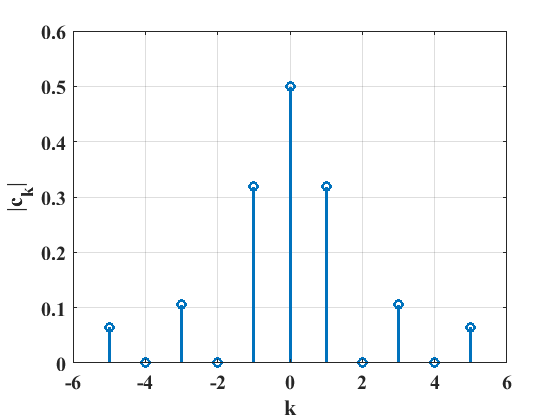

In [45]:
clear
close all
clc

N=5;
c0=0.5;
w0=pi;
in=[-N:N];
coef=[];

for k=-N:N
  ck(N+k+1)=(1/(k*pi))*sin(k*pi/2);
  coef(N+k+1)=(1/(k*pi))*sin(k*pi/2)*exp(i*k*pi);
if k==0;
ck(N+1)=0.5;
coef(N+1)=0.5;
end

end

stem(in,abs(ck),"LineWidth",2)

grid;
xlabel("k");
ylabel("|c_k|")
axis([-N-1 N+1 0 0.6])
set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold'); 


## Representación de señales 

La representación de el tren de pulsos definido por la ecuación ({eq}`func_pulso`) en términos de la serie compleja exponencial se puede representar usando el siguiente código ({cite:t}`KamenMATLAB`):



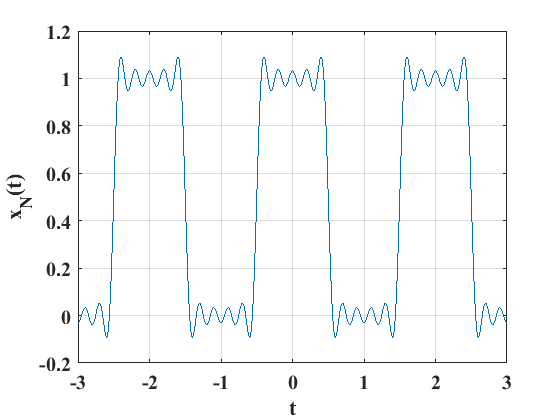

In [51]:
clear
close all
clc

t=-3:0.001:3;
N=10;

c0=0.5;
omega0=pi;

xN=c0*ones(1,length(t));

for k=1:N

    ck=(1/(k*pi))*sin((k*pi/2));
    c_k=ck;
    xN=xN+ck*exp(i*k*omega0*t)+c_k*exp(-i*k*omega0*t);

end


plot(t,xN)
grid;
xlabel("t");
ylabel("x_{N}(t)")

set(gca,'fontsize',15);
set(gca,'fontname','Times New Roman','FontWeight','Bold'); 


